In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
data = pd.read_csv("calories.csv")
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
data.shape

(15000, 9)

In [12]:
data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [13]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
continous_vars = ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Calories"]

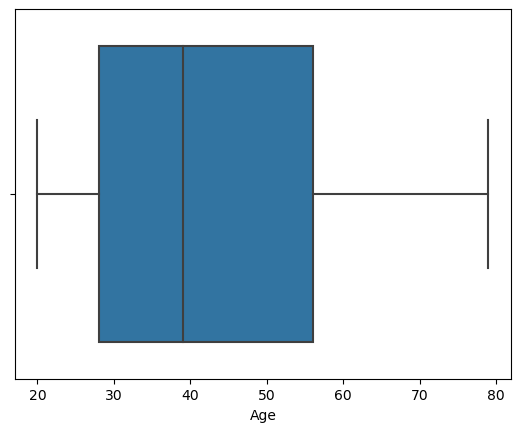

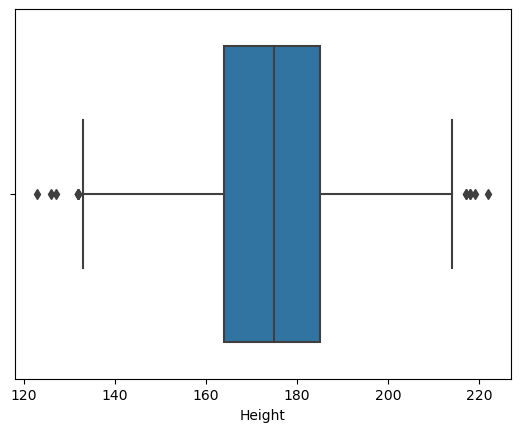

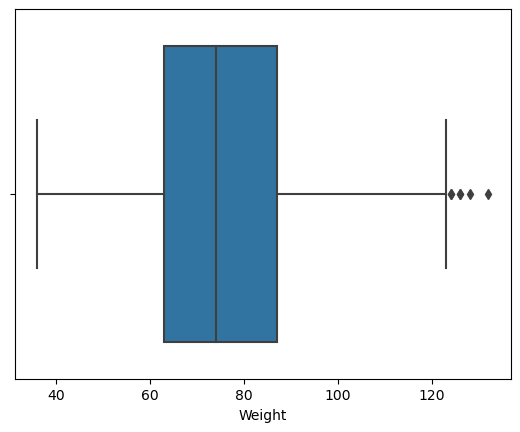

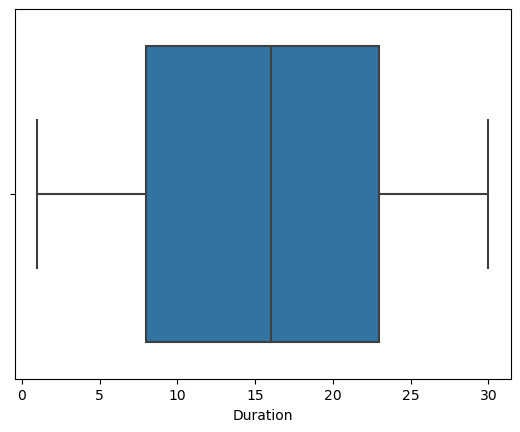

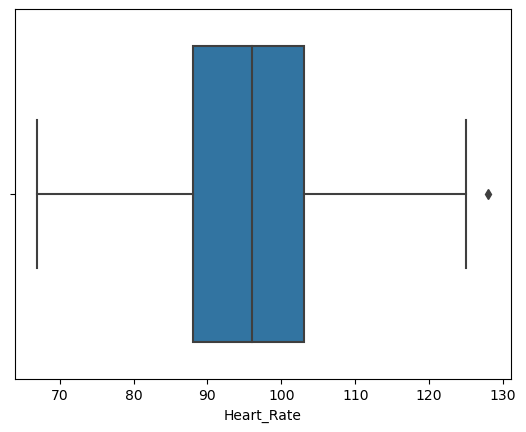

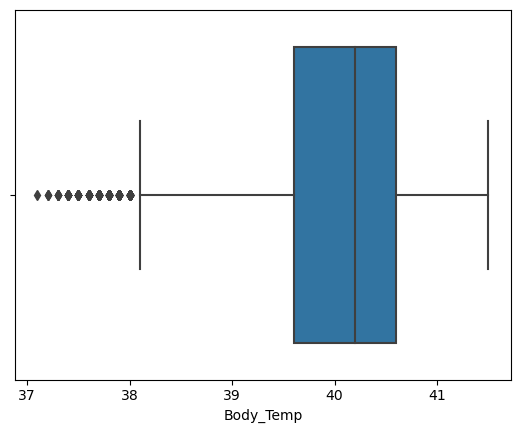

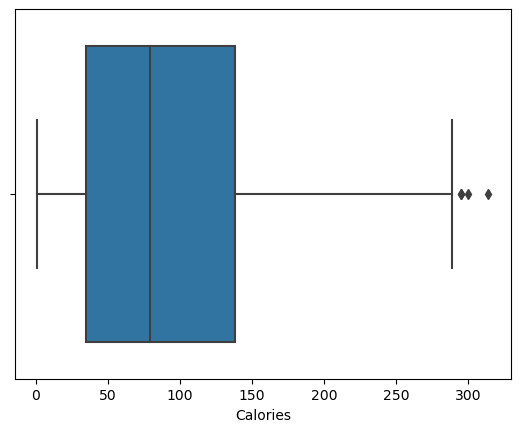

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


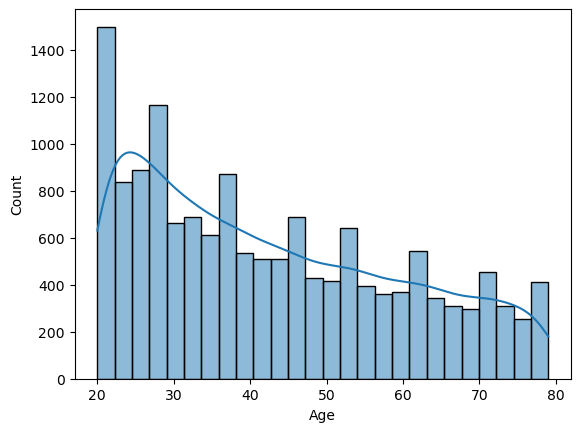

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


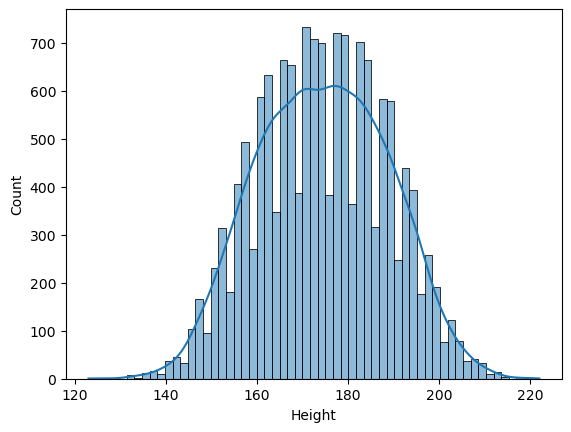

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


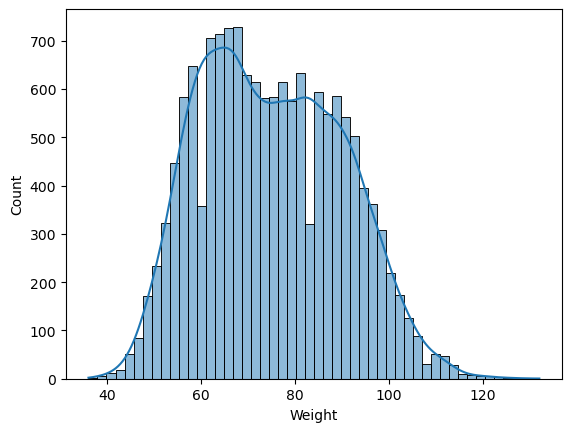

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


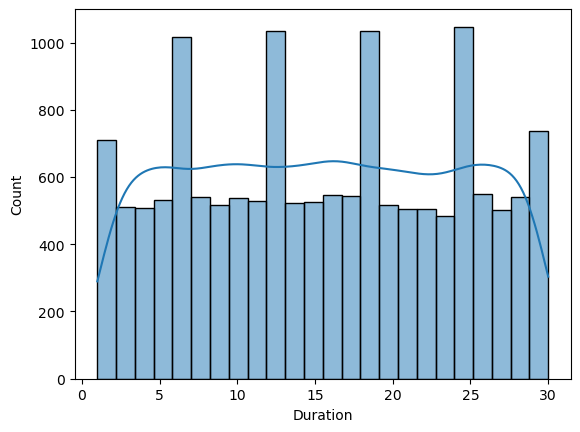

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


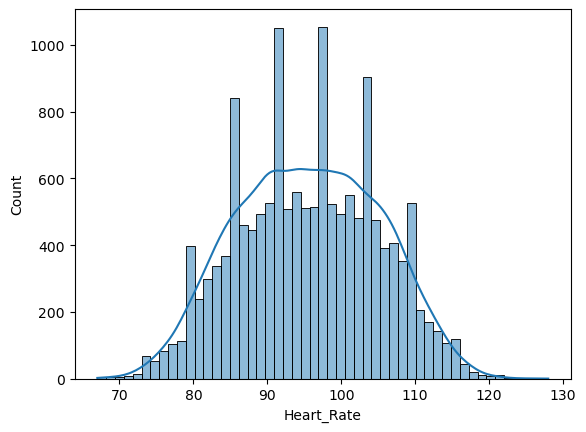

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


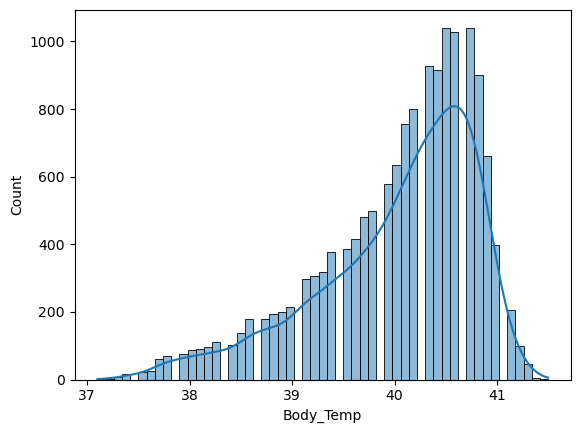

C:\Users\NIKITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


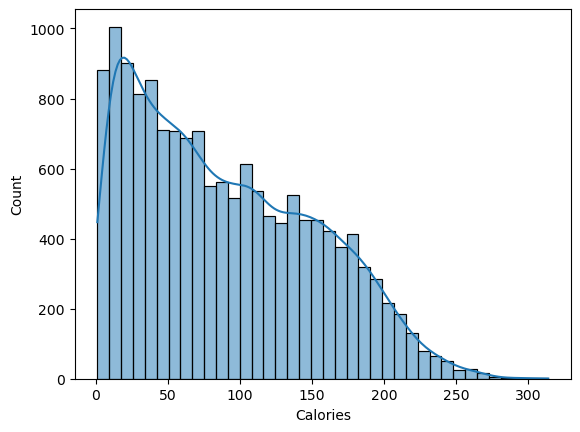

In [17]:
for var in continous_vars:
    sns.boxplot(x=var , data=data)
    plt.show()
    
for var in continous_vars:
    sns.histplot(data=data, x=var, kde=True)
    plt.show()

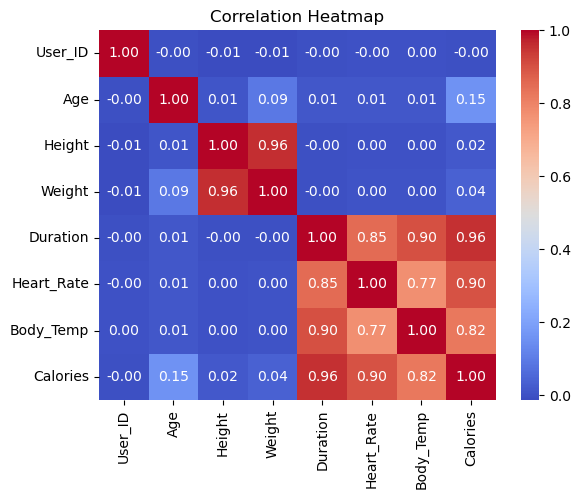

In [19]:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
def select_features(data,target_var,threshold):
    corr = data.corr()
    
    features = corr.loc[(corr[target_var]>threshold) ,target_var].index.tolist()
    
    new_data=data[features]
    
    return new_data

In [29]:
data = select_features(numeric_data,'Calories',0.5)

In [30]:
data

,Duration,Heart_Rate,Body_Temp,Calories
0,29.0,105.0,40.8,231.0
1,14.0,94.0,40.3,66.0
2,5.0,88.0,38.7,26.0
3,13.0,100.0,40.5,71.0
4,10.0,81.0,39.8,35.0
...,...,...,...,...
14995,11.0,92.0,40.4,45.0
14996,6.0,85.0,39.2,23.0
14997,16.0,90.0,40.1,75.0
14998,2.0,84.0,38.3,11.0


In [31]:
X = data.drop(['Calories'],axis=1)
y = data['Calories']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test,lr_predictions)
lr_r2score = r2_score(y_test,lr_predictions)
print(" Linear Regression RMSE: ",lr_rmse)
print(" Linear Regression R2: ",lr_r2score)

 Linear Regression RMSE:  216.08235682070813
 Linear Regression R2:  0.9464584932015652


In [38]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_rmse = mean_squared_error(y_test,tree_predictions)
tree_r2score = r2_score(y_test,tree_predictions)
print(" Decision Tree RMSE: ",tree_rmse)
print(" Decision Tree R2: ",tree_r2score)

 Decision Tree RMSE:  236.25266831088325
 Decision Tree R2:  0.9414606355066223


In [39]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test,rf_predictions)
rf_r2score = r2_score(y_test,rf_predictions)
print(" Random Forest RMSE: ",rf_rmse)
print(" Random Forest R2: ",rf_r2score)

 Random Forest RMSE:  197.05954359579133
 Random Forest R2:  0.9511720204815935


In [41]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_rmse = mean_squared_error(y_test,gb_predictions)
gb_r2score = r2_score(y_test,gb_predictions)
print(" Gradient Boosting RMSE: ",gb_rmse)
print(" Gradient Boosting R2: ",gb_r2score)

 Gradient Boosting RMSE:  157.54749438706193
 Gradient Boosting R2:  0.9609624294833087


In [43]:
import pickle

with open('best_model.pkl','wb') as file:
    pickle.dump(gb,file)

In [48]:
with open('best_model.pkl','rb') as file:
    gb = pickle.load(file)
    
new_data=[[15,93,42]]
prediction = gb.predict(new_data)
print(prediction)

[95.73816064]


C:\Users\NIKITHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
